In [1]:
import enzymeML_builder.EnzymeML_builder as EnzymeMLBuilder

columns = ["Column3", "Column4","Column5","Column6", "Column7", "Column8","Column9", "Column10" ]
concentrations = [0, 1,2,3, 4, 5, 6, 7]

for i, j in zip(columns, concentrations):

    data = EnzymeMLBuilder.EnzymeMLBuilder("j", i, j).build_measurements_list()

{'title': 'ABTS-Assay template ', 'enzymes': [{'name': 'laccase', 'type': 'wildtype', 'organism': 'Streptomyces coelicolor', 'concentration': '0,000085', 'unit': 'mmol/L', 'others': [{'key': 'volumetric activity', 'value': '0,1 u/ml'}], 'reaction': {'educts': [{'name': 'ABTS', 'role': 'substrate', 'concentration': 0, 'smiles': 'CCN1C2=C(C=C(C=C2)S(=O)(=O)O)SC1=NN=C3N(C4=C(S3)C=C(C=C4)S(=O)(=O)O)CC', 'others': []}], 'products': [{'name': 'ABTS+', 'role': 'product', 'concentration': '0', 'unit': 'mmol/L', 'smiles': 'CCN1C2=C(C=C(C=C2)S(=O)(=O)[O-])SC1=NN=C3[N+](C4=C(S3)C=C(C=C4)S(=O)(=O)[O-])CC', 'others': []}]}, 'sequence': 'not given', 'ecNumber': 'not given'}], 'vessel': {'type': '96-well plate ', 'volume': '100', 'unit': 'µL', 'others': []}, 'condition': {'temp': '25', 'ph': '3', 'buffer': {}, 'others': []}, 'experimentalData': {'measurements': []}, 'user': {'firstName': 'Alaric', 'lastName': 'Prins'}}
{'title': 'ABTS-Assay template ', 'enzymes': [{'name': 'laccase', 'type': 'wildtyp

In [2]:
import pandas as pd

from submodule_copy import importer


df1 = None
df2 = None
df3 = None
df4 = None
df5 = None
df6 = None

dfs = [df1, df2, df3, df4, df5]

vars = locals()

vars["df11"] = "Hallo!!"



for i in concentrations:
  path = 'A540nm/AlaricnoEnzml'+str(i)+'mmolL.omex'
  vars["df_"+str(i)] = importer(path).build_data_frame()
 
  

#print(locals())
  


'''

data_model = None
path = 'A540nm/AlaricnoEnzml6mmolL.omex'
document = importer(path).build_data_frame()
print(document)

'''

{'x_values': [0.0, 1.4833333333333334, 2.966666666666667, 4.45, 5.95, 7.433333333333334, 8.916666666666666, 10.4, 11.95, 13.483333333333333, 14.983333333333333, 16.483333333333334, 17.983333333333334, 19.483333333333334, 20.983333333333334, 22.483333333333334, 23.983333333333334, 25.483333333333334, 26.983333333333334, 28.483333333333334, 30.0], 'reference_0': [0.0373, 0.0372, 0.0379, 0.0375, 0.0386, 0.0391, 0.0396, 0.0387, 0.0384, 0.0381, 0.0376, 0.0381, 0.0385, 0.0398, 0.0403, 0.0405, 0.0409, 0.0403, 0.0417, 0.0421, 0.0424], 'reference_1': [0.0387, 0.0374, 0.038, 0.0372, 0.039, 0.0376, 0.0376, 0.0381, 0.0387, 0.0383, 0.0386, 0.038, 0.0377, 0.0383, 0.0387, 0.0382, 0.0376, 0.0377, 0.0375, 0.0385, 0.0376], 'reference_2': [0.0374, 0.0376, 0.0374, 0.0486, 0.0374, 0.0505, 0.0373, 0.0371, 0.0373, 0.0372, 0.0373, 0.0404, 0.0373, 0.0373, 0.0375, 0.0728, 0.0373, 0.0414, 0.0378, 0.0404, 0.0373], 'sample_0': [0.0342, 0.0346, 0.0342, 0.0343, 0.0342, 0.0344, 0.0344, 0.0344, 0.0345, 0.0345, 0.0344,

"\n\ndata_model = None\npath = 'A540nm/AlaricnoEnzml6mmolL.omex'\ndocument = importer(path).build_data_frame()\nprint(document)\n\n"

'\nax.plot(document["x_values"],document["reference_0"], color="black")\nax.plot(document["x_values"],document["reference_2"], color="black")\nax.plot(document["x_values"],document["reference_1"], color="black")\nax.plot(document["x_values"],document["sample_0"], color="black", marker="d")\nax.plot(document["x_values"],document["sample_1"], color="black", marker="d")\nax.plot(document["x_values"],document["sample_2"], color="black", marker="d")\n\n'

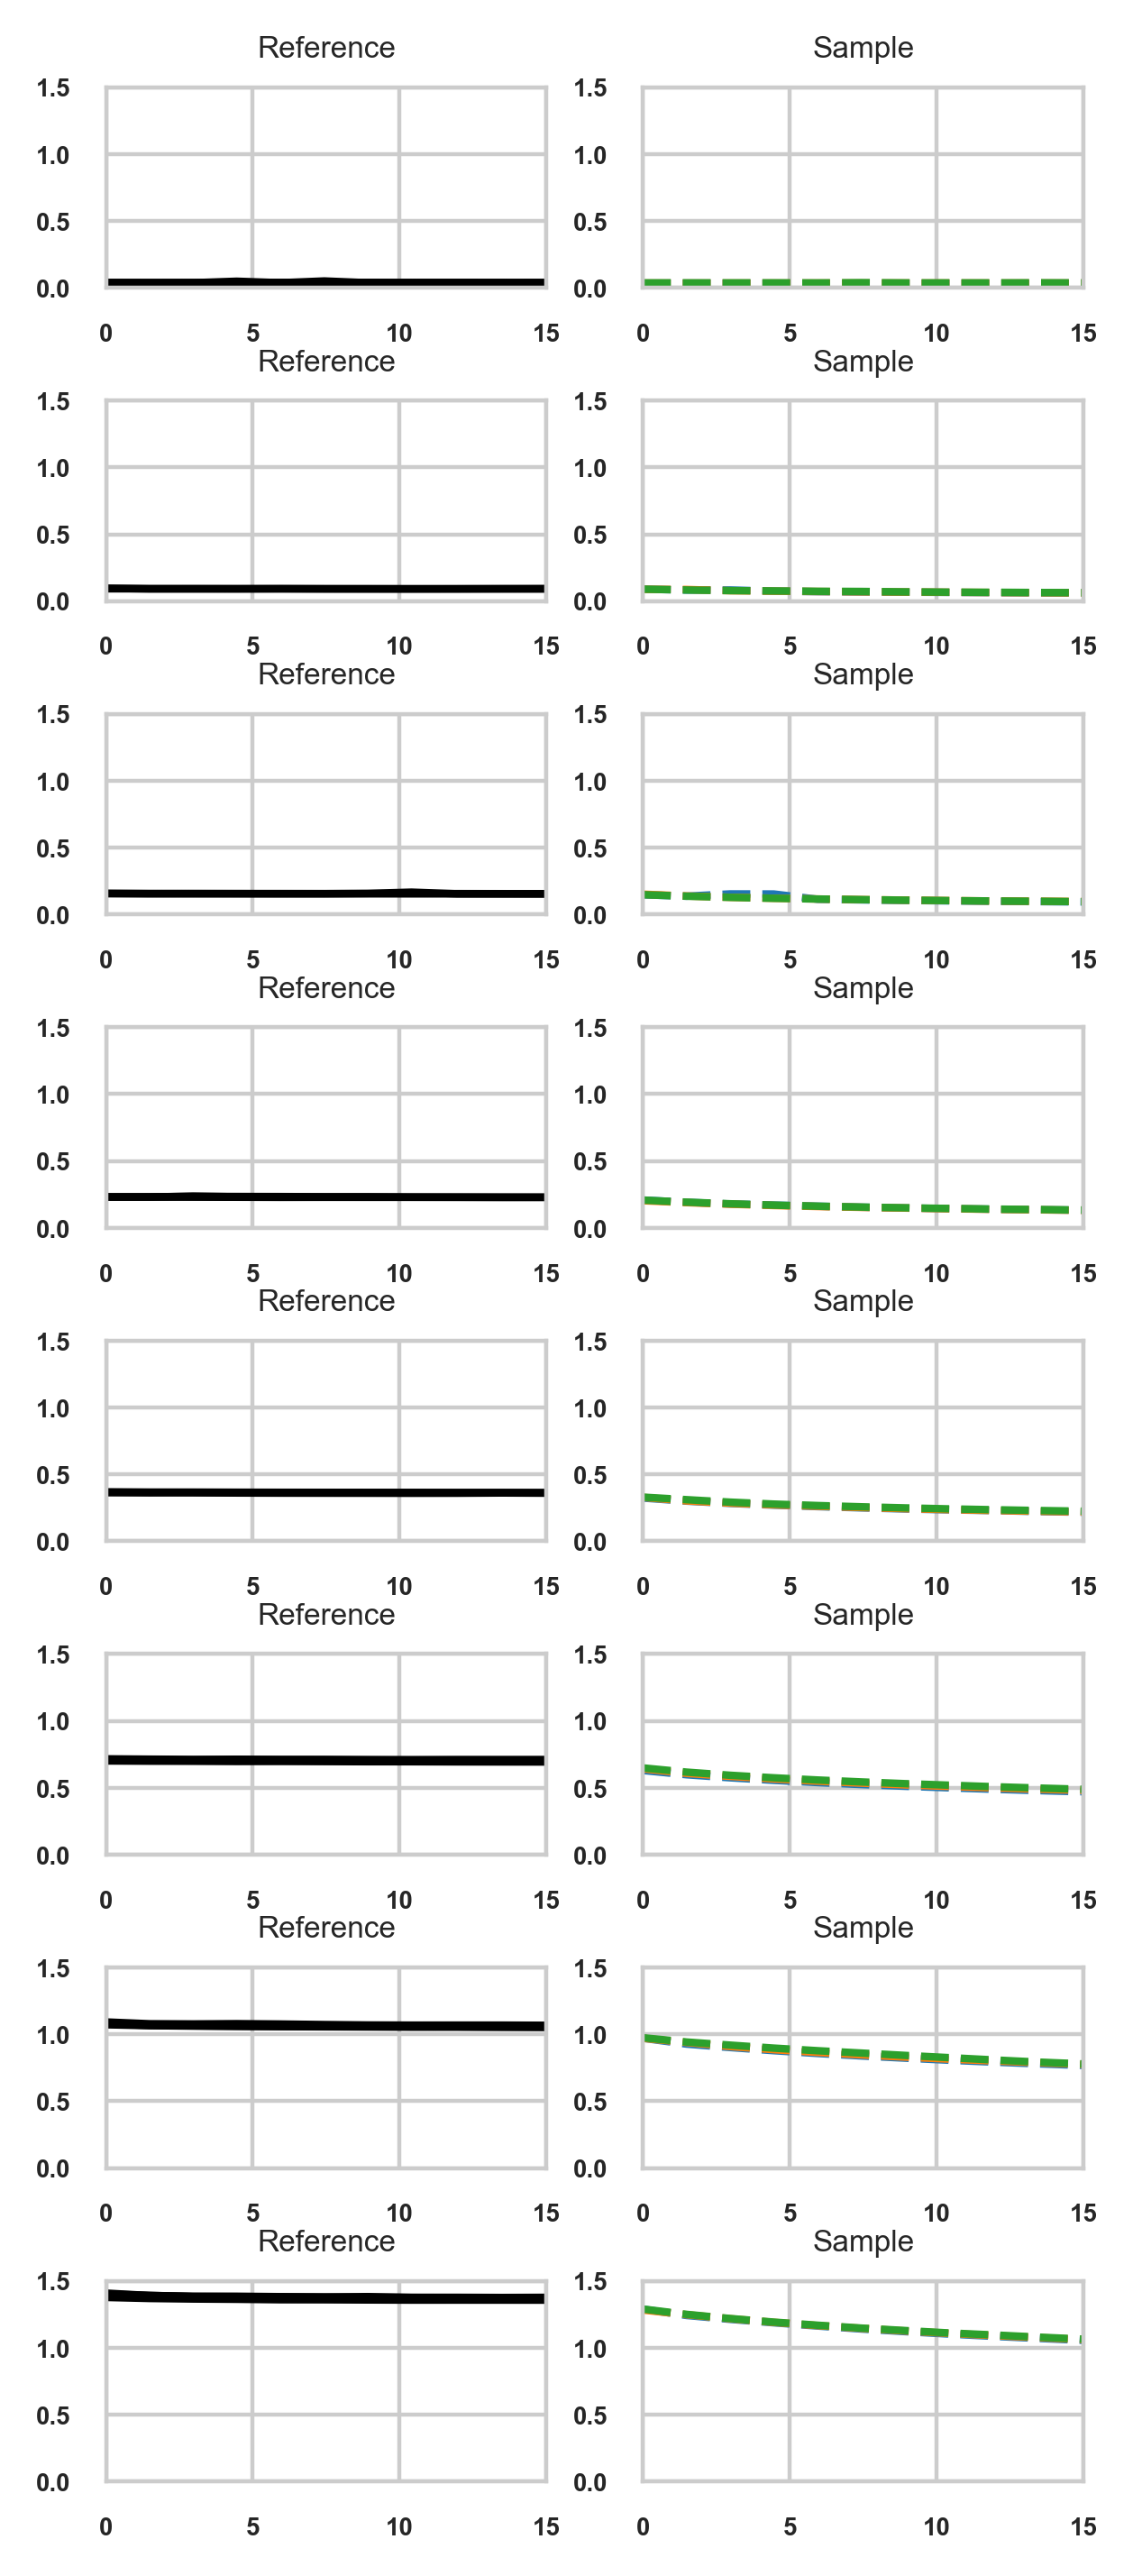

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 5}

plt.rc('font', **font)

plt.rcParams['figure.dpi'] =400 
sns.set_style("whitegrid")
fig, ax = plt.subplots(8, 2, figsize=(3,7))
for i in concentrations:

    #fig,ax=plt.subplots()

    conc = locals()["df_"+str(concentrations.index(i))]
    index = concentrations.index(i)
    for j in range(3):
        ax[index, 0].plot(conc["x_values"], conc["reference_"+str(j)], color="black")
    
    for k in range(3):
        ax[index, 1].plot(conc["x_values"], conc["sample_"+str(k)], linestyle="--")

    ax[index, 0].set_ylim(0,1.5)
    ax[index, 0].set_title("Reference")
    ax[index, 0].set_xlim(0,15)
    ax[index, 1].set_title("Sample")
    ax[index, 1].set_ylim(0,1.5)
    ax[index, 1].set_xlim(0,15)


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.1)

#ax.plot(df_1["x_values"], df_1["reference_0"])


'''
ax.plot(document["x_values"],document["reference_0"], color="black")
ax.plot(document["x_values"],document["reference_2"], color="black")
ax.plot(document["x_values"],document["reference_1"], color="black")
ax.plot(document["x_values"],document["sample_0"], color="black", marker="d")
ax.plot(document["x_values"],document["sample_1"], color="black", marker="d")
ax.plot(document["x_values"],document["sample_2"], color="black", marker="d")

'''

In [4]:
## Modelling the data with PySCeS

from scipy import stats
import numpy as np

#data = locals()["df_1"]

#print(data)

slopes = []

for i in concentrations:
    print(i)
    conc = locals()["df_"+str((concentrations.index(i)))]
    slope_1 = []
    for j in range(3):
        slope, intercept, rvalue, pvalue, stderr = stats.linregress(conc["x_values"], conc["sample_"+str(j)])
        slope_1.append(slope)
    slopes.append(slope_1)

print(slopes)


slopes_mean = []

for i in slopes:
    slope_array = np.array(i)
    slopes_mean.append(np.mean(slope_array))

print(slopes_mean)





0
1
2
3
4
5
6
7
[[6.657801378197065e-06, 1.6237970388587915e-05, 7.1749245877218915e-06], [-0.0009863470820453111, -0.0009872768162002934, -0.001019721590661731], [-0.002304869327071717, -0.00191995920411527, -0.001828399286142088], [-0.002818555193580141, -0.0027243487892769837, -0.002779854123972292], [-0.004230713481052326, -0.004230378831594624, -0.004200095774728042], [-0.006851264135317988, -0.006873112088237902, -0.006882175956610148], [-0.008920146598062586, -0.0088357201562191, -0.009076493929011905], [-0.010535276933431946, -0.010319335996616368, -0.010307529355363906]]
[1.002356545150229e-05, -0.0009977818296357784, -0.002017742605776358, -0.0027742527022764723, -0.004220396029124998, -0.006868850726722012, -0.008944120227764531, -0.010387380761804073]


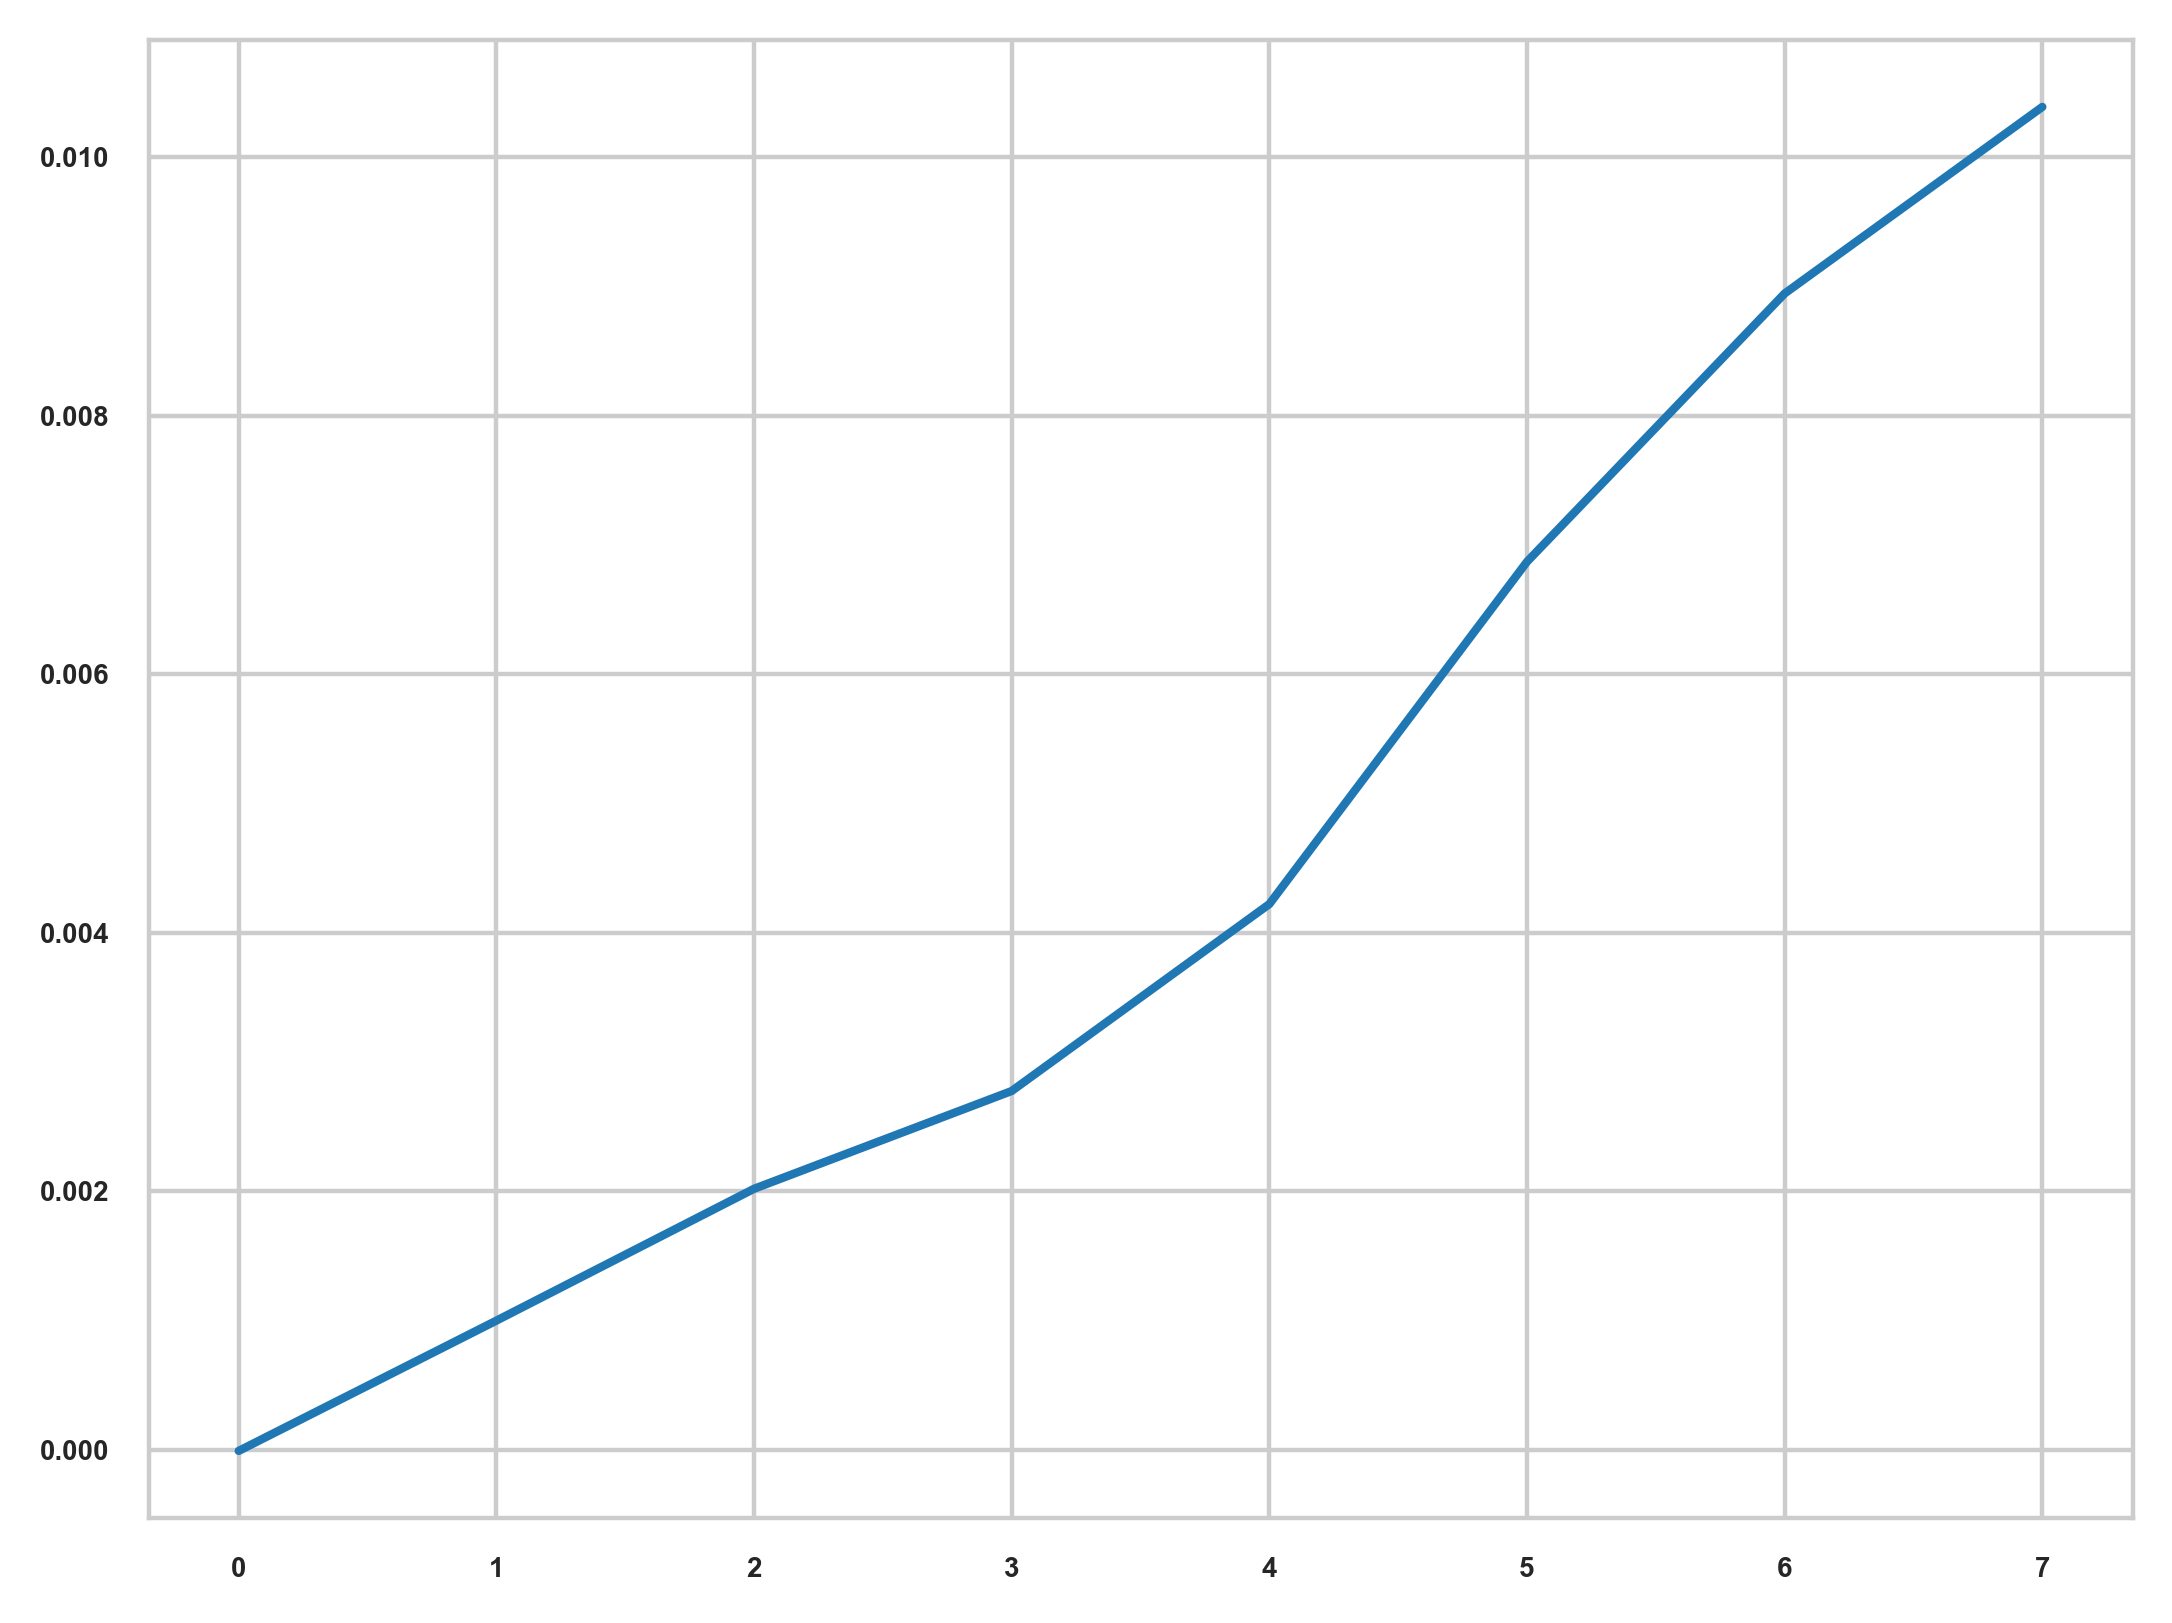

In [5]:
import matplotlib.pyplot as plt

dataframe = locals()["df_1"] 
x_values = dataframe["x_values"]
concentrations = [0, 1,2,3, 4, 5, 6, 7]

slopes_array = np.array(slopes_mean)
slopes_positive = slopes_array*-1



plt.plot(concentrations, slopes_positive)

In [3]:
import pysces
import scipy
pysces.test()
#mod = pysces.model('michaelis_menten')

#mod.Scan1()

#mod.scan_in  = 'x0'
#mod.scan_out = ['J_R1', 'J_R2', 's1_ss', 's2_ss']
#mod.scan_out = ['R1', 'vmax', 'Km']
#scan_range = scipy.linspace(0,100,11)

#mod.Scan1(scan_range)
#print("results+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++", mod.scan_res)
#mod.Scan1Plot()


.......


Copying pysces_test models if necessary ...
src : c:\Users\Stephan\miniconda3\envs\pysces2\lib\site-packages\pysces\pscmodels
dest: C:\Users\Stephan\Pysces\psc
done.

Level 1 tests


.
----------------------------------------------------------------------
Ran 8 tests in 0.192s

OK



Level 2 tests


............
----------------------------------------------------------------------
Ran 12 tests in 2.098s

OK


In [18]:
mod.Scan1Plot(title=None, log=None, format='lines', filename="name.pngS")
#print("results+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++", mod.scan_res)

<IPython.core.display.Javascript object>

Image exported as "C:\Users\Stephan\Pysces\name.pngS.png"


In [6]:
import pysces

pysces.test()

........


Copying pysces_test models if necessary ...
src : c:\Users\Stephan\miniconda3\envs\pysces2\lib\site-packages\pysces\pscmodels
dest: C:\Users\Stephan\Pysces\psc
done.

Level 1 tests



----------------------------------------------------------------------
Ran 8 tests in 0.054s

OK



Level 2 tests


............
----------------------------------------------------------------------
Ran 12 tests in 2.113s

OK
